In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/My Drive/Dataset/ToPed/tokped_encode2.zip"

Archive:  /content/drive/My Drive/Dataset/ToPed/tokped_encode2.zip
replace tokped_encode2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: tokped_encode2.csv      


In [ ]:
%matplotlib inline
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import pydotplus
import matplotlib.pylab as plt
import matplotlib.image as pltimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('tokped_encode2.csv')

In [ ]:
df.head()

,memory_size,location_cat,sold_cat,type_cat,merk_cat,prosesor_cat,disk_size_cat,price_cat
0,2,12,0,6,0,14,5,0
1,1,60,2,6,0,4,10,0
2,1,13,1,6,0,4,10,0
3,3,13,2,6,0,17,10,1
4,1,13,112,6,0,14,10,0


In [ ]:
features = ['sold_cat','prosesor_cat','memory_size','disk_size_cat','price_cat']
X = df[features]
y = df['merk_cat']

print(X)
print(y)

        sold_cat  prosesor_cat  memory_size  disk_size_cat  price_cat
0              0            14            2              5          0
1              2             4            1             10          0
2              1             4            1             10          0
3              2            17            3             10          1
4            112            14            1             10          0
...          ...           ...          ...            ...        ...
119054         0            10            4              8          1
119055         1            18            4              8          1
119056         0            14            2              5          0
119057         6            18            2              5          1
119058         0            19            4              8          2

[119059 rows x 5 columns]
0         0
1         0
2         0
3         0
4         0
         ..
119054    2
119055    2
119056    2
119057    2
119058    2
N

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.138257 to fit



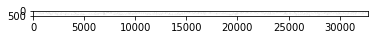

In [ ]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0)

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = dtree.predict(X_test)
y_pred

array([8, 8, 2, ..., 0, 0, 3])

In [ ]:
print(dtree.predict([[6, 19, 5, 8, 2]]))

[8]


In [ ]:
clf = RandomForestClassifier(n_estimators=20, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
clf_pred = clf.predict(X_test)
clf_pred

array([8, 8, 2, ..., 0, 0, 3])

In [ ]:
print(clf.predict([[6, 19, 5, 8, 2]]))

[8]


In [ ]:
confusion_array = sklearn.metrics.confusion_matrix(y_test,clf_pred)
print(confusion_array)

[[ 5080     0  1263   428     0     0    49     0  1238    32     0     0
      0]
 [    0    44     6     0     0     0     1     0     7     0     0     0
      0]
 [ 1235     1 10926   572     0     0   158     0  2192    62     0     0
      0]
 [  935     3   821  2716     0     0    54     0   898    18     0     0
      0]
 [    4     0     0     0     2     0     0     0     0     0     0     0
      0]
 [    0     0     5     0     0     0     0     0     0     0     0     0
      0]
 [  159     7  1213   118     0     0  1039     0   817    15     0     2
      0]
 [    0     0     0     0     0     0     0     4     2     0     0     0
      0]
 [ 1298     0  1597   440     0     0   231     0 10345    52     0     1
      0]
 [   49     0   564    49     0     0    24     0   397   392     0     0
      0]
 [    0     0     9     0     0     0     0     0     1     0     0     0
      0]
 [    0     0     0     0     0     0     0     0    11     0     0    33
      0]
 [  

In [ ]:
confusion_array = sklearn.metrics.confusion_matrix(y_test,y_pred)
print(confusion_array)

[[ 5214     0  1195   434     0     0    54     0  1161    32     0     0
      0]
 [    0    44     7     0     0     0     4     0     3     0     0     0
      0]
 [ 1309     1 10887   578     0     0   145     0  2170    56     0     0
      0]
 [  962     3   806  2730     0     0    55     0   871    18     0     0
      0]
 [    4     0     0     0     2     0     0     0     0     0     0     0
      0]
 [    0     0     5     0     0     0     0     0     0     0     0     0
      0]
 [  162     7  1223   118     0     0  1028     0   815    15     0     2
      0]
 [    0     0     0     0     0     0     0     4     2     0     0     0
      0]
 [ 1362     0  1627   422     0     0   230     0 10273    49     0     1
      0]
 [   49     0   574    57     0     0    24     0   382   389     0     0
      0]
 [    0     0     9     0     0     0     0     0     1     0     0     0
      0]
 [    0     0     0     0     0     0     0     0    11     0     0    33
      0]
 [  

In [ ]:
clf.score(X_test, y_test)

0.6421342180413238

In [ ]:
sklearn.metrics.accuracy_score(y_test, clf_pred)

0.6421342180413238

In [ ]:
dtree.score(X_test, y_test)

0.6426171678145473

In [ ]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.6426171678145473

In [ ]:
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.32160255, 0.40815555, 0.4192424 , 0.42046027, 0.3758767 ])